In [1]:
import pandas as pd 
ML_Data=pd.read_csv(r'C:\Users\sandy\Desktop\Project_realected_practice\Car_deako\ML_Dataset\Caped_ML_Dataset.csv')
ML_Data.head()

,City,Body_type,Fuel_type,Transmission_Type,Manufactured_By,kilometers_Driven,Previous_owners,Seats,Mileage,Engine,Car Age,Price
0,Bangalore,Hatchback,Petrol,Manual,Maruti,120000,3,5,23.10,998.0,9,400000
1,Bangalore,SUV,Petrol,Manual,Ford,32706,2,5,17.00,1497.0,6,811000
2,Bangalore,Hatchback,Petrol,Manual,Tata,11949,1,5,23.84,1199.0,6,585000
3,Bangalore,Sedan,Petrol,Manual,Hyundai,17794,1,5,19.10,1197.0,10,462000
4,Bangalore,SUV,Diesel,Manual,Maruti,60000,1,5,23.65,1248.0,9,790000


First lets do a lable encoding for all the categorical columns and store the Mapped value since it will be used in the Deployment process

In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import json

# Initialize a dictionary to store mappings
category_mappings = {}

# Identify categorical columns (object type)
categorical_columns = ['City', 'Body_type', 'Fuel_type', 'Transmission_Type', 'Manufactured_By']

# Loop through each categorical column and encode
for column in categorical_columns:
    le = LabelEncoder()
    ML_Data[column] = le.fit_transform(ML_Data[column])
    
    # Convert NumPy int64 to Python int and store the mapping
    category_mappings[column] = {str(k): int(v) for k, v in zip(le.classes_, le.transform(le.classes_))}

# Save the mappings to a JSON file
with open(r'C:\Users\sandy\Desktop\Project_realected_practice\Car_deako\category_mappings.json', 'w') as f:
    json.dump(category_mappings, f)


Encoded data frame

In [3]:
ML_Data.head()

,City,Body_type,Fuel_type,Transmission_Type,Manufactured_By,kilometers_Driven,Previous_owners,Seats,Mileage,Engine,Car Age,Price
0,0,2,4,1,20,120000,3,5,23.10,998.0,9,400000
1,0,7,4,1,6,32706,2,5,17.00,1497.0,6,811000
2,0,2,4,1,29,11949,1,5,23.84,1199.0,6,585000
3,0,8,4,1,9,17794,1,5,19.10,1197.0,10,462000
4,0,7,1,1,20,60000,1,5,23.65,1248.0,9,790000


This is the Last step of the process since here I have a both Encoded and Non encoded columns it will be easy to check the model performance I have used this code here.

In [20]:
import pickle
import numpy as np

# Load the pre-trained model
model_path = 'Less_Gradient_boost_model.pkl'
with open(model_path, 'rb') as file:
    model = pickle.load(file)
Scale_path='Scale.pkl'
with open(Scale_path, 'rb') as file:
    Scale = pickle.load(file)

# Define the categorical mappings
categorical_mappings = {
    "City": {"Bangalore": 0, "Chennai": 1, "Delhi": 2, "Hyderabad": 3, "Jaipur": 4, "Kolkata": 5},
    "Body_type": {"Convertibles": 0, "Coupe": 1, "Hatchback": 2, "Hybrids": 3, "MUV": 4, "Minivans": 5, "Pickup Trucks": 6, "SUV": 7, "Sedan": 8, "Wagon": 9},
    "Fuel_type": {"Cng": 0, "Diesel": 1, "Electric": 2, "Lpg": 3, "Petrol": 4},
    "Transmission_Type": {"Automatic": 0, "Manual": 1},
    "Manufactured_By": {"Audi": 0, "BMW": 1, "Chevrolet": 2, "Citroen": 3, "Datsun": 4, "Fiat": 5, "Ford": 6, "Hindustan Motors": 7, "Honda": 8, "Hyundai": 9, "Isuzu": 10, "Jaguar": 11, "Jeep": 12, "Kia": 13, "Land Rover": 14, "Lexus": 15, "MG": 16, "Mahindra": 17, "Mahindra Renault": 18, "Mahindra Ssangyong": 19, "Maruti": 20, "Mercedes-Benz": 21, "Mini": 22, "Mitsubishi": 23, "Nissan": 24, "Opel": 25, "Porsche": 26, "Renault": 27, "Skoda": 28, "Tata": 29, "Toyota": 30, "Volkswagen": 31, "Volvo": 32}
}

# Manually input your data here
input_data = {
    'City': 'Bangalore',
    'Body_type': 'SUV',
    'Fuel_type': 'Petrol',
    'Transmission_Type': 'Manual',
    'Manufactured_By': 'Ford',
    'kilometers_driven': 32706,
    'previous_owners': 2,
    'seats': 5,
    'mileage': 17.00,
    'engine': 1497.0,
    'car_age': 6
}

# Encode categorical features
encoded_features = [
    categorical_mappings['City'][input_data['City']],
    categorical_mappings['Body_type'][input_data['Body_type']],
    categorical_mappings['Fuel_type'][input_data['Fuel_type']],
    categorical_mappings['Transmission_Type'][input_data['Transmission_Type']],
    categorical_mappings['Manufactured_By'][input_data['Manufactured_By']],
]

# Combine all features into a single input array
features = np.array([
    *encoded_features,
    input_data['kilometers_driven'],
    input_data['previous_owners'],
    input_data['seats'],
    input_data['mileage'],
    input_data['engine'],
    input_data['car_age']
]).reshape(1, -1)

# Predict the price using the model
predicted_price = model.predict(Scale.transform(features))[0]

# Output the result
print(f"Predicted Vehicle Price: ₹{predicted_price:,.2f}")


Predicted Vehicle Price: ₹798,495.01


c:\Users\sandy\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


By seing the I can able to conclude that my model is performing well because the 

The actuall value is 811000
And Predicted value is ₹798,495.01 which is verymuch near.

Now all the column are changed to a numerical value using the Label Encoding

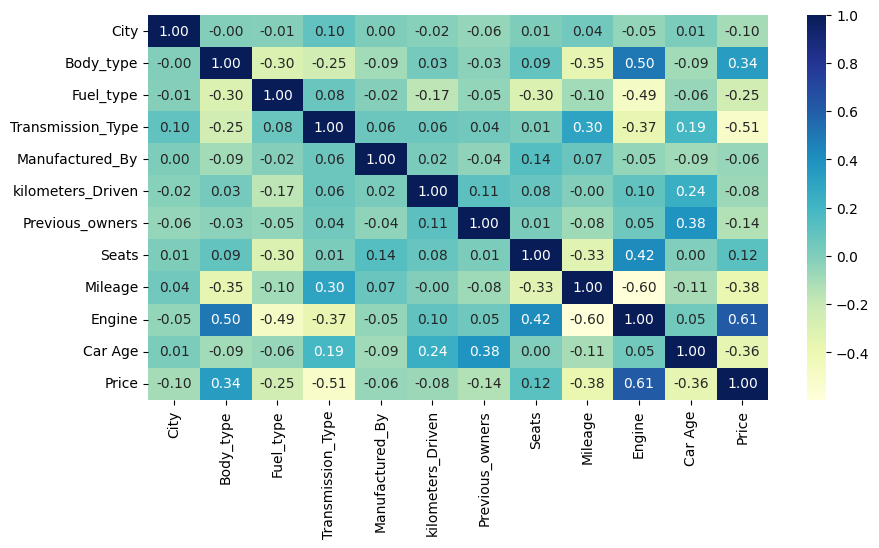

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix = ML_Data.corr()


plt.figure(figsize=(10, 5))  


sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu', fmt='.2f')


plt.show()



By seeing this I can able say every column have a correlation with Price. 

                       Strong >--------------< Weak

Positive correlation - Engine > Body_type > Seats

Negative Correlation - Transmission_Type > Mileage > Car Age > Fuel_Type > Previous_Owners > City > Kilometers_Driven > Manufactured_By

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

Lets select which data we want to be Feature and which want to be a Target

In [6]:
Features=ML_Data.iloc[:,:-1]


In [7]:
Target=ML_Data['Price']
Target.head()

0    400000
1    811000
2    585000
3    462000
4    790000
Name: Price, dtype: int64

In [8]:
X_train, X_test, y_train, y_test = train_test_split(Features, Target, test_size=0.2, random_state=42)

Now let's do a normalisation or standadization for Features and Target

In [9]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


I have pickle the standardscaler since it will be used while creating the streamlit app

In [162]:
import pickle


# Save the model to a file using Pickle
with open('Scale.pkl', 'wb') as file:
   pickle.dump(scaler, file)

Lets train the model with 7 different algorithm and check its R2 score 

In [14]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import SGDRegressor

# Initialize the models
model_Lr = LinearRegression()
model_dt = DecisionTreeRegressor(random_state=42)
model_rf = RandomForestRegressor(random_state=42, n_estimators= 100)
model_gb = GradientBoostingRegressor(n_estimators = 100)
model_svr = SVR()
model_knn = KNeighborsRegressor(n_neighbors=8)
model_sgd = SGDRegressor()

# Fit each model
model_Lr.fit(X_train_scaled, y_train)
model_dt.fit(X_train_scaled, y_train)
model_rf.fit(X_train_scaled, y_train)
model_gb.fit(X_train_scaled, y_train)
model_svr.fit(X_train_scaled, y_train)
model_knn.fit(X_train_scaled, y_train)
model_sgd.fit(X_train_scaled, y_train)


SGDRegressor()

In [12]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import root_mean_squared_error

In [15]:


# Calculate and print MSE and R^2 for each model
models = {
    "LinearRegression": model_Lr,
    "Decision Tree": model_dt,
    "Random Forest": model_rf,
    "Gradient Boosting": model_gb,
    "Support Vector Regression": model_svr,
    "K-Nearest Neighbors": model_knn,
    "SGDRegressor": model_sgd
}

Model=[]
R2_Evalu=[]
R2_validation=[]
# Iterate through the models to compute and display the metrics
for name, model in models.items():
    y_pred = model.predict(X_test_scaled)
    rmse = root_mean_squared_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    Model.append(name)
    R2_Evalu.append(round(r2,2))

    print(f'Evaluation score')
    print(f"{name} Model:")
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"Root Mean Squared Error (RMSE):, {rmse:.2f}")
    print(f"R^2 Score: {r2:.2f}")
    print("-" * 30)

    y_pred_train = model.predict(X_train_scaled)
    mse_1 = mean_squared_error(y_train,y_pred_train) 
    rmse_1 = root_mean_squared_error(y_train,y_pred_train)
    r2_1 = r2_score(y_train,y_pred_train)
    R2_validation.append(round(r2_1,2))

    print(f'Validation score') 
    print(f"{name} Model:")
    print(f"Mean Squared Error: {mse_1:.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse_1:.2f}")
    print(f"R^2 Score: {r2_1:.2f}")
    print("-" * 30)



Evaluation score
LinearRegression Model:
Mean Squared Error: 416737029221.67
Root Mean Squared Error (RMSE):, 645551.72
R^2 Score: 0.58
------------------------------
Validation score
LinearRegression Model:
Mean Squared Error: 431284865766.95
Root Mean Squared Error (RMSE): 656722.82
R^2 Score: 0.61
------------------------------
Evaluation score
Decision Tree Model:
Mean Squared Error: 126191234133.15
Root Mean Squared Error (RMSE):, 355234.06
R^2 Score: 0.87
------------------------------
Validation score
Decision Tree Model:
Mean Squared Error: 141631729.67
Root Mean Squared Error (RMSE): 11900.91
R^2 Score: 1.00
------------------------------
Evaluation score
Random Forest Model:
Mean Squared Error: 69675931269.28
Root Mean Squared Error (RMSE):, 263961.99
R^2 Score: 0.93
------------------------------
Validation score
Random Forest Model:
Mean Squared Error: 11322133276.87
Root Mean Squared Error (RMSE): 106405.51
R^2 Score: 0.99
------------------------------
Evaluation score
Gr

In [118]:
print(Model)
print(R2_Evalu)
print(R2_validation)

['LinearRegression', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'Support Vector Regression', 'K-Nearest Neighbors', 'SGDRegressor']
[0.58, 0.87, 0.93, 0.9, -0.08, 0.84, 0.58]
[0.61, 1.0, 0.99, 0.92, -0.09, 0.87, 0.6]


Before doing any optimization the Model scores are like this 

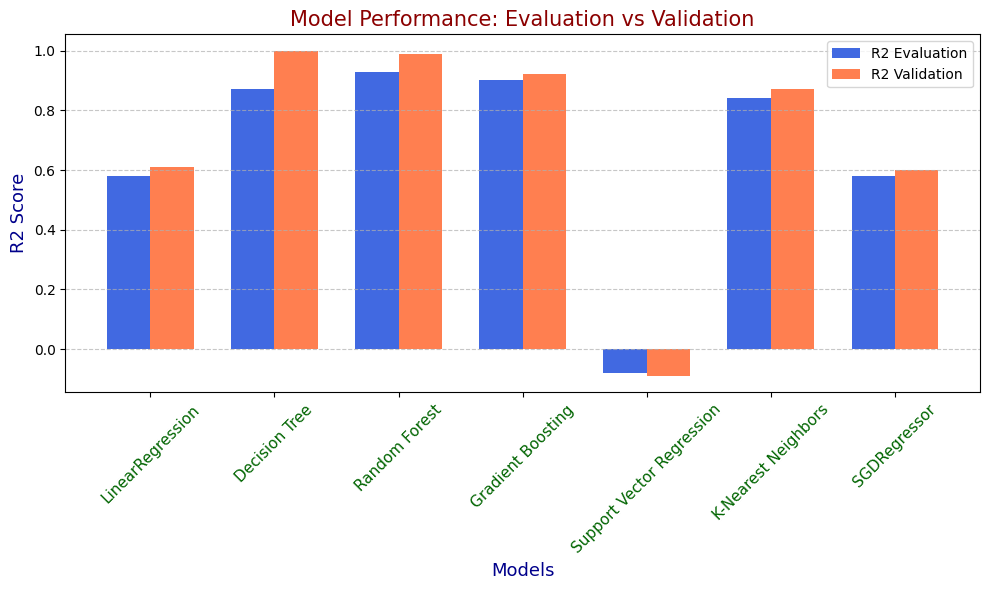

In [119]:
import matplotlib.pyplot as plt
import numpy as np

# Set up the figure and axes
plt.figure(figsize=(10, 6))

# Plotting the grouped bar chart
bar_width = 0.35
index = np.arange(len(Model))

plt.bar(index, R2_Evalu, width=bar_width, color='royalblue', label='R2 Evaluation')
plt.bar(index + bar_width, R2_validation, width=bar_width, color='coral', label='R2 Validation')

# Labeling the chart
plt.xlabel('Models', fontsize=13, color='darkblue')
plt.ylabel('R2 Score', fontsize=13, color='darkblue')
plt.title('Model Performance: Evaluation vs Validation', fontsize=15, color='darkred')

# Adding model names
plt.xticks(index + bar_width / 2, Model, rotation=45, fontsize=11, color='darkgreen')

# Adding a legend and grid
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


Trying to optimize the R2 score of the Random Forest Regressor 

In [120]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Initialize the RandomForestRegressor
rf = RandomForestRegressor(random_state=42)

# Define an expanded parameter grid
param_grid = {
    'n_estimators': [20,50,100],           # Increased options for number of trees
    'max_depth': [10, 20, 40, None],            # More depth values including deeper trees
    'min_samples_split': [2, 5, 15],            # More variations for splits
    'min_samples_leaf': [1, 2, 6],               # More leaf sizes
    'max_features': ['auto', 'sqrt', 'log2'],       # All common feature selection methods
    'bootstrap': [True, False]                      # Bootstrap on/off
}

# Setup the GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2, scoring='r2')

# Fit the grid search to the data
grid_search.fit(X_train_scaled, y_train)

# Best parameters and best score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best R2 Score: {grid_search.best_score_:.4f}")

# Get the best model from grid search
best_rf = grid_search.best_estimator_

# Make predictions using the best model
Best_y_pred = best_rf.predict(X_test_scaled)


Fitting 5 folds for each of 648 candidates, totalling 3240 fits


c:\Users\sandy\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
1080 fits failed out of a total of 3240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
518 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\sandy\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\sandy\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\sandy\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ba

Best Parameters: {'bootstrap': False, 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best R2 Score: 0.9250


In [121]:
#evaluation
Best_y_pred_eva = best_rf.predict(X_test_scaled)
rmse_best = root_mean_squared_error(y_test, Best_y_pred_eva)
mse_best = mean_squared_error(y_test, Best_y_pred_eva)
r2_best = r2_score(y_test, Best_y_pred_eva)

print(f'Evaluation score Optimized Random_forest')
print(f"Mean Squared Error: {mse_best:.2f}")
print(f"Root Mean Squared Error (RMSE):, {rmse_best:.2f}")
print(f"R^2 Score: {r2_best:.2f}")

#validation
Best_y_pred_val = best_rf.predict(X_train_scaled)
mse_1_best = mean_squared_error(y_train,Best_y_pred_val) 
rmse_1_best = root_mean_squared_error(y_train,Best_y_pred_val)
r2_1_best = r2_score(y_train,Best_y_pred_val)

print(f'Validation score Optimized Random_forest') 
print(f"Mean Squared Error: {mse_1_best:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_1_best:.2f}")
print(f"R^2 Score: {r2_1_best:.2f}")



Evaluation score Optimized Random_forest
Mean Squared Error: 63128570104.85
Root Mean Squared Error (RMSE):, 251254.00
R^2 Score: 0.94
Validation score Optimized Random_forest
Mean Squared Error: 202545371.48
Root Mean Squared Error (RMSE): 14231.84
R^2 Score: 1.00


In [122]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for the DecisionTreeRegressor
params = {
    'max_depth': [2, 4, 6, 8, 10, 12, 15, 20],   # Added deeper trees
    'min_samples_split': [2, 3, 4, 5, 10],       # Added more options for minimum samples required to split
    'min_samples_leaf': [1, 2, 4, 6, 8],         # Added more options for minimum samples at a leaf node
    'max_features': [None, 'auto', 'sqrt', 'log2'],  # Number of features to consider for the best split
    'criterion': ['mse', 'friedman_mse', 'mae'], # Different criteria for splitting
    'splitter': ['best', 'random']               # Strategy used to split at each node
}

# Initialize the DecisionTreeRegressor
regressor = DecisionTreeRegressor()

# Set up the GridSearchCV
gcv = GridSearchCV(estimator=regressor, param_grid=params, cv=5, scoring='r2', n_jobs=-1, verbose=2)

# Fit the grid search on the training data
gcv.fit(X_train_scaled, y_train)

# Output the best parameters and the best score
print("Best Parameters: ", gcv.best_params_)
print("Best R² Score on Training Set: ", gcv.best_score_)

# Evaluate the best model on the test set
best_regressor = gcv.best_estimator_
y_pred = best_regressor.predict(X_test_scaled)
r2_test = r2_score(y_test, y_pred)
print("R² Score on Test Set: ", r2_test)


Fitting 5 folds for each of 4800 candidates, totalling 24000 fits
Best Parameters:  {'criterion': 'friedman_mse', 'max_depth': 15, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'splitter': 'best'}
Best R² Score on Training Set:  0.8729458076122633
R² Score on Test Set:  0.8700683113790556


c:\Users\sandy\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
18000 fits failed out of a total of 24000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
702 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\sandy\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\sandy\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\sandy\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\

In [124]:
#evaluation
y_pred_Dt_e = best_regressor.predict(X_test_scaled)
rmse_best = root_mean_squared_error(y_test, y_pred_Dt_e)
mse_best = mean_squared_error(y_test, y_pred_Dt_e)
r2_best = r2_score(y_test, y_pred_Dt_e)

print(f'Evaluation score Optimized Decition Tree')
print(f"Mean Squared Error: {mse_best:.2f}")
print(f"Root Mean Squared Error (RMSE):, {rmse_best:.2f}")
print(f"R^2 Score: {r2_best:.2f}")

#validation
y_pred_Dt_V = best_regressor.predict(X_train_scaled)
mse_1_best = mean_squared_error(y_train,y_pred_Dt_V) 
rmse_1_best = root_mean_squared_error(y_train,y_pred_Dt_V)
r2_1_best = r2_score(y_train,y_pred_Dt_V)

print(f'Validation score Optimized Decition Tree') 
print(f"Mean Squared Error: {mse_1_best:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_1_best:.2f}")
print(f"R^2 Score: {r2_1_best:.2f}")

Evaluation score Optimized Decition Tree
Mean Squared Error: 129481491463.21
Root Mean Squared Error (RMSE):, 359835.37
R^2 Score: 0.87
Validation score Optimized Decition Tree
Mean Squared Error: 37608729993.04
Root Mean Squared Error (RMSE): 193929.70
R^2 Score: 0.97


Trying to optimize the R2 score of the Gradient Boosting Regressor 

In [10]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import r2_score

gbr = GradientBoostingRegressor(random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],        # Number of boosting rounds
    'learning_rate': [0.01, 0.05, 0.1],     # Step size shrinkage
    'max_depth': [2, 6, 5,7],                 # Maximum depth of each tree
    'min_samples_split': [2, 6, 8],        # Minimum samples to split an internal node
    'min_samples_leaf': [1, 5, 3],          # Minimum samples at a leaf node
    'subsample': [0.4, 0.6, 0.9],           # Fraction of samples used for fitting
    'max_features': ['auto', 'sqrt', 'log2']  # Number of features to consider
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=gbr,
                           param_grid=param_grid,
                           scoring='r2',          # Optimizing for R² score
                           cv=5,                  # 5-fold cross-validation
                           n_jobs=-1,             # Use all cores
                           verbose=2)

# Fit the grid search
grid_search.fit(X_train_scaled, y_train)

# Best parameters and score
print("Best Parameters: ", grid_search.best_params_)
print("Best R² Score on Training Set: ", grid_search.best_score_)

# Evaluate on the test set
best_gbr = grid_search.best_estimator_
y_pred_gbr = best_gbr.predict(X_test_scaled)
r2_test_gbr = r2_score(y_test, y_pred_gbr)
print("R² Score on Test Set: ", r2_test_gbr)


Fitting 5 folds for each of 2916 candidates, totalling 14580 fits


c:\Users\sandy\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
4860 fits failed out of a total of 14580.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2946 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\sandy\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\sandy\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\sandy\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\

Best Parameters:  {'learning_rate': 0.1, 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300, 'subsample': 0.9}
Best R² Score on Training Set:  0.9417536181480399
R² Score on Test Set:  0.9427071238996422


In [13]:
#evaluation
y_pred_gbr = best_gbr.predict(X_test_scaled)
rmse_best = root_mean_squared_error(y_test, y_pred_gbr)
mse_best = mean_squared_error(y_test, y_pred_gbr)
r2_best_gbr = r2_score(y_test, y_pred_gbr)

print(f'Evaluation score Optimized Gradient Boosting')
print(f"Mean Squared Error: {mse_best:.2f}")
print(f"Root Mean Squared Error (RMSE):, {rmse_best:.2f}")
print(f"R^2 Score: {r2_best_gbr:.2f}")

#validation
y_pred_gbr = best_gbr.predict(X_train_scaled)
mse_1_best = mean_squared_error(y_train,y_pred_gbr) 
rmse_1_best = root_mean_squared_error(y_train,y_pred_gbr)
r2_1_best_gbr = r2_score(y_train,y_pred_gbr)

print(f'Validation score Optimized Gradient Boosting') 
print(f"Mean Squared Error: {mse_1_best:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_1_best:.2f}")
print(f"R^2 Score: {r2_1_best_gbr:.2f}")

Evaluation score Optimized Gradient Boosting
Mean Squared Error: 57094363403.01
Root Mean Squared Error (RMSE):, 238944.27
R^2 Score: 0.94
Validation score Optimized Gradient Boosting
Mean Squared Error: 14022657523.25
Root Mean Squared Error (RMSE): 118417.30
R^2 Score: 0.99


Now lets compare the R2 scores for the model which are optimized

In [15]:
models_Final=['DecisionTree_before','DecisionTree_After','RandomForest_Before','RandomForest_After','GradientBoosting_Before','GradientBoosting_After']
R2_evalu_Scores=[0.87,0.87,0.93,0.94,0.90,0.94]
R2_Valu_Scores=[1.0, 0.97,0.99,1.0,0.92,0.99]

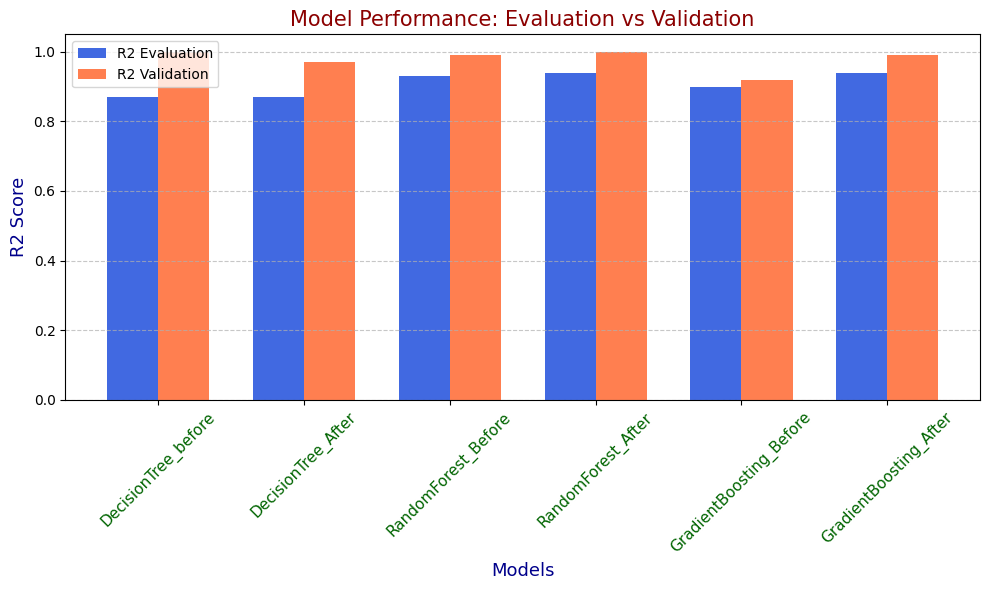

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Set up the figure and axes
plt.figure(figsize=(10, 6))

# Plotting the grouped bar chart
bar_width = 0.35
index = np.arange(len(models_Final))

plt.bar(index, R2_evalu_Scores, width=bar_width, color='royalblue', label='R2 Evaluation')
plt.bar(index + bar_width, R2_Valu_Scores, width=bar_width, color='coral', label='R2 Validation')

# Labeling the chart
plt.xlabel('Models', fontsize=13, color='darkblue')
plt.ylabel('R2 Score', fontsize=13, color='darkblue')
plt.title('Model Performance: Evaluation vs Validation', fontsize=15, color='darkred')

# Adding model names
plt.xticks(index + bar_width / 2, models_Final, rotation=45, fontsize=11, color='darkgreen')

# Adding a legend and grid
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


So By seeing this the Decision Tree and Random Forest Model is also good but there is a possibility for the Underfitting since in both model the Validation score is have a higher diffrence between Validation and Evaluating scores so I go with the Gradient Boosting Model.

Lets see the feature importance by using the Random forest Model

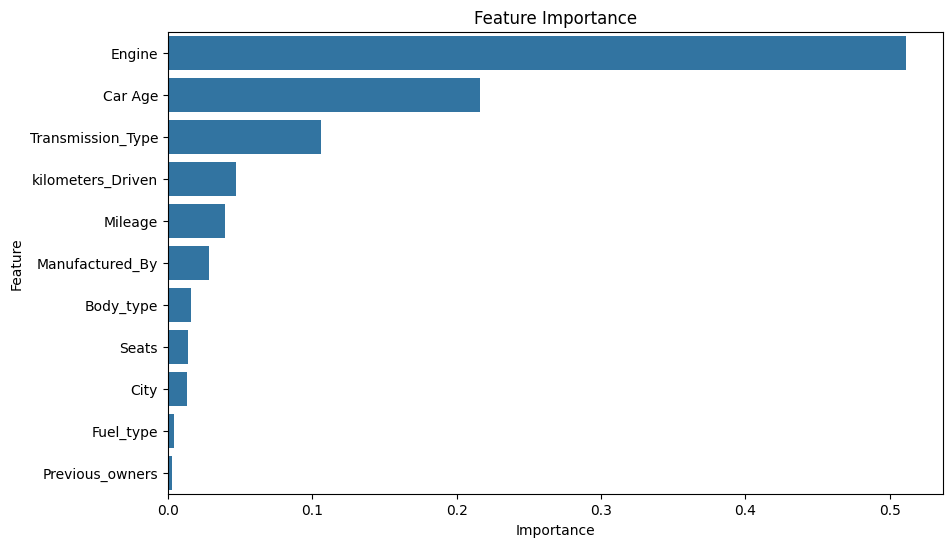

In [130]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor


feature_importance = model_rf.feature_importances_

features_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance
})

# Sorting the features by importance
features_df = features_df.sort_values(by='Importance', ascending=False)

# Plotting the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=features_df)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


Now after running the several test the Gradient Boosting Reggressor model is performing best in when comparing to other model so I will go with this model I need to preserve this in order to make a deployment.

In [17]:
import pickle


# Save the model to a file using Pickle
with open('Less_Gradient_boost_model.pkl', 'wb') as file:
   pickle.dump(model_gb, file)

In [134]:
import pandas as pd

# Load your dataset
df = pd.read_csv(r'C:\Users\sandy\Desktop\Project_realected_practice\Car_deako\ML_Dataset\New_Caped_ML_Dataset.csv')

# Identifying the numerical columns
numerical_columns = ['kilometers_Driven', 'Previous_owners', 'Seats', 'Mileage', 'Engine', 'Car Age']

# Calculate the minimum and maximum values for all numerical columns
numerical_min_max = df[numerical_columns].agg(['min', 'max']).T

# Display the min and max values
print(numerical_min_max)


                     min          max
kilometers_Driven   0.00  5500000.000
Previous_owners     0.00        5.000
Seats               2.00       10.000
Mileage             8.13       43.615
Engine             72.00     4407.500
Car Age             1.00       39.000
